In [1]:
# Import libraries
import pandas as pd
import pyreadstat as pyr

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# 2nd analysis
#load df
df, meta = pyr.read_sav('afrobarometer_nigeria_rd8_2021.sav')
# Select specific columns from the Dataframe based on the information provided in the metadata
# and Replaces the code numbers with the actual values in each column using their actual name in the metadata
columns = ['REGION','Q7A', 'Q7B', 'Q7C']
df_new = df.copy()[columns]
for i in columns:
    x = meta.variable_value_labels[i]
    df_new[i].replace(x, inplace=True)
    


# Rename columns
df_new.columns = ['State', 'Without food', 'Without water', 'Without medical care']

df_new.head()

,State,Without food,Without water,Without medical care
0,IMO,Just once or twice,Several times,Many times
1,FCT ABUJA,Several times,Several times,Several times
2,FCT ABUJA,Several times,Never,Just once or twice
3,FCT ABUJA,Never,Never,Never
4,FCT ABUJA,Never,Never,Never


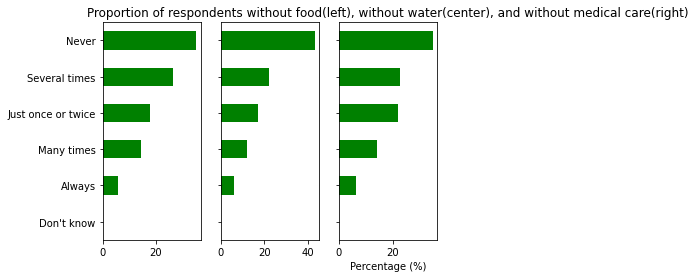

In [32]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,sharey=True) #creates subplots calling the subplots with 1 row and 2 columns, sharey =True makes them align better
(df_new['Without food'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=axis1, color='green')
plt.xlabel('Percentage (%)')
plt.ylabel('Without food')
plt.title('Proportion of respondents without food(left), without water(center), and without medical care(right)')
(df_new['Without water'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=axis2, color='green')
plt.xlabel('Percentage (%)')
(df_new['Without medical care'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=axis3, color='green');

In [33]:
(df_new['Without food'].value_counts(normalize=True).sort_values()*100)

Don't know             0.062539
Always                 5.816135
Many times            14.383990
Just once or twice    17.823640
Several times         26.579112
Never                 35.334584
Name: Without food, dtype: float64

In [34]:
(df_new['Without water'].value_counts(normalize=True).sort_values()*100)

Don't know             0.125078
Always                 6.003752
Many times            12.070044
Just once or twice    16.948093
Several times         21.951220
Never                 42.901814
Name: Without water, dtype: float64

In [35]:
(df_new['Without medical care'].value_counts(normalize=True).sort_values()*100)

Don't know             0.125078
Always                 6.441526
Many times            14.008755
Just once or twice    21.826141
Several times         22.701689
Never                 34.896811
Name: Without medical care, dtype: float64